# Chapter 6

## 학습 관련 기술들

### 이번 장에서는

- 가중치 매개변수 최적값 탐색 방법
- 가중치매개변수 초기값, 하이퍼파라미터 설정 방법

→ 신경망 학습의 효율과 정확도를 높이기 위함

### 6.1 매개변수 갱신

최적화 : 손실함수의 값을 가능한 한 낮추는 최적 매개변수를 찾는 것

- 확률적 경사 하강법(SGD)
- 모멘텀
- AdaGrad
- Adam

### 확률적 경사 하강법

매개변수의 기울기를 구해, 기울어진 방향으로 매개변수 값을 갱신하는 일을 반복하는 것

SGD는 ** 기울어진 방향으로 일정 거리만 가겠다 ** 는 단순한 방법

![Imgur](https://i.imgur.com/WToakBq.png)

In [4]:
class SGD :
    def __init__(self, lr=0.01):
        self.lr = lr #lr은 learning rate를 뜻함
        
    def update(self, params, grads):
        for key in params.keys():
            params[key] -=self.lr*grads[key]

#### SGD의 단점

단순하고 구현도 쉽지만, 문제에 따라서 비효율적인 경우가 있음

![Imgur](https://i.imgur.com/gOgxSgK.png)
![Imgur](https://i.imgur.com/dfJWeBe.png)

위 함수에 대해 SGD를 적용하였을 때, 심하게 굽어진 비효율적인 움직임을 보임.

방향에 따라 성질(기울기)이 달라지는 비등방성 함수로, 탐색 경로가 비효율적임

### 모멘텀

v는 속도. 
기울기 방향으로 힘을 받아 물체가 가속된다는 물리 법칙을 적용함

![Imgur](https://i.imgur.com/yOmuniJ.png)

![Imgur](https://i.imgur.com/FnmLtNd.png)

In [5]:
class Momentum:

    """모멘텀 SGD"""

    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():                                
                self.v[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.v[key] = self.momentum*self.v[key] - self.lr*grads[key] 
            params[key] += self.v[key]


![Imgur](https://i.imgur.com/sMkDFdN.png)

모멘텀의 갱신 경로는 SGD와 비교해 지그재그 정도가 덜함.

x축의 힘은 아주 작지만 방향을 변하지 않아서 한 방향으로 일정하게 가속하고,

y축의 힘은 크지만 위아래로 번갈아 받아서 상축하여 y축 방향의 속도는 안정적이지 않음

전체적으로 x축 방향으로 빠르게 다가갈 수 있어 지그재그 움직임을 줄일 수 있음

### AdaGrad

신경망 학습에서 학습률이 너무 작으면 학습 시간이 길어지고 너무 크면 발산하여 올바른 학습을 할 수 없음

각각의 매개변수에 맞춤형 학습률 값을 만들어주는 AdaGrad 방법.

개별 매개변수에 적응적으로 학습률을 조정하면서 학습을 진행

![Imgur](https://i.imgur.com/EuoklR4.png)

![Imgur](https://i.imgur.com/yMalNNj.png)

h는 학습률을 조정하기 위한 변수. 매개변수의 원소 중에서 많이 움직인 원소는 학습률이 낮아지도록 조정.

In [7]:
class AdaGrad:

    """AdaGrad"""

    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
            
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)
            #1e-7이라는 작은 값을 더하여 h에 0이 담겨있어도 0으로 나누는 것을 막아줌

![Imgur](https://i.imgur.com/re188Lx.png)

AdaGrad를 사용하여 최적화 문제를 푼 것. 최솟값을 향해 효율적으로 움직임

y축 방향은 기울기가 커서 처음에는 크게 움직이지만, 큰 움직임에 비례해 갱신 정도도 큰 폭으로 작아지도록 조정됨. 따라서 지그재그 움직임이 줄어듦.

### Adam

모멘텀과 AdaGrad의 이점을 융합한 방법

하이퍼파라미터의 편향보정이 진행됨

![Imgur](https://i.imgur.com/I8LS5ce.png)

모멘텀과 비슷하나 모멘텀보다 공의 좌우 흔들림이 적음.

### 어떤 갱신 방법을 이용할 것인가?

![Imgur](https://i.imgur.com/5W3WgNS.png)

사용한 기법에 따라 갱신 경로가 다름.

이 문제에서는 AdaGrad가 가장 좋은 것처럼 보이지만, 풀어야할 문제에 따라 결과는 달라짐.

모든 문제에서 항상 뛰어난 기법은 없으므로 여러 가지로 시도해봐야함

### 6.2 가중치의 초깃값

- 정규분포
- Xavier 초깃값
- He 초깃값


### 초깃값을 0으로 하면?

가중치 감소 기법 : 가중치 매개변수의 값이 작아지도록 학습하는 방법. 오버피팅을 방지함

가중치를 작게하려면 초깃값도 최대한 작게 시작 → 가중치 초깃값을 모두 0으로 설정하면? (X)

가중치 초깃값이 모두 0이면 오차역전파법에서 모든 가중치의 값이 똑같이 갱신됨 (순전파 때 입력층 가중치가 0이면 두 번째 층의 뉴런에 모두 같은 값이 전달됨. 즉, 역전파 때 두 번째 층의 가중치가 모두 똑같이 갱신됨)

따라서, 초깃값을 무작위로 설정해야함

### 은닉층의 활성화값 분포

5층 신경망(활성화 함수는 시그모이드)에 무작위로 생성한 입력 데이터를 흘리며 각 층의 활성호값 분포를 히스토그램으로 나타냄


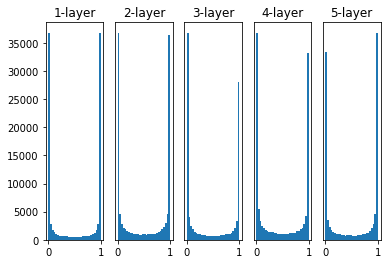

In [2]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000개의 입력 데이터를 무작위로 생성
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) * 1 #가중치 초깃값의 분포는 표준편차가 1인 정규분포
    
    a = np.dot(x, w)

    z = sigmoid(a)
    
    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    plt.hist(a.flatten(), 30, range=(0,1))
    
plt.show()


각 층의 활성화 값들이 0과 1에 치우쳐 분포됨.

시그모이드 함수는 출력이 0이나 1에 가까워지면 미분은 0으로 수렴.

** 기울기 소실(gradient vanishing) ** 문제 : 데이터가 0과 1에 치우쳐 분포하게 되면 역전파의 기울기 값이 점점 작아지다가 사라지는 문제

가중치의 표준편차를 0.01로 바꿔서 실험 반복

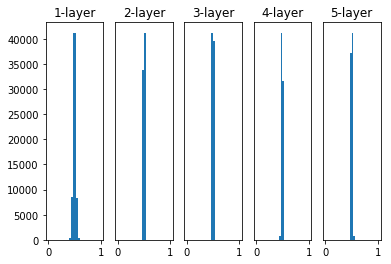

In [3]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000개의 입력 데이터를 무작위로 생성
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) * 0.01
    
    a = np.dot(x, w)
    
    z = sigmoid(a)
    
    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()


활성화 값이 0.5 부근에 집중됨. → 다수의 뉴런이 거의 같은 값을 출력하고 있어, 뉴런을 여러 개 둔 의미가 없음. (** 표현력을 제한 **)

각 층의 활성화 값은 적당히 고루 분포해야 함.

#### Xavier 초깃값

앞 계층의 노드가 n개일 때, 표준편차가 1/root(n)인 분포를 사용

앞 층에 노드가 많을수록 대상 노드의 초깃값으로 설정하는 가중치가 좁게 퍼짐.

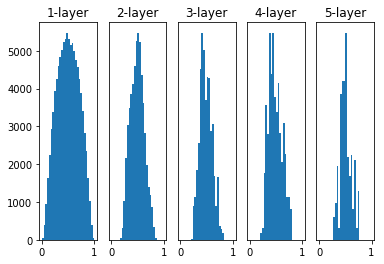

In [4]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000개의 입력 데이터를 무작위로 생성
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)

    a = np.dot(x, w)

    z = sigmoid(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()


층이 깊어지면서 형태가 일그러지지만, 앞선 방식보다는 넓게 분포함

이는 시그모이드 함수가 (0,0.5)를 기준으로 대칭이기 때문 → 시그모이드 함수처럼 'S'자 모양 곡선 함수이면서 원점 대칭인 쌍곡선 함수 사용

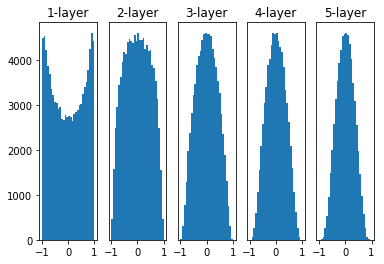

In [3]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000개의 입력 데이터를 무작위로 생성
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)

    a = np.dot(x, w)

    z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    plt.hist(a.flatten(), 30, range=(-1,1))
plt.show()


### 6.2 ReLU를 사용할 때의 가중치 초깃값

ReLU는 음의 영역이 0이라서 초깃값을 더 넓게 분포시켜야 함

** He 초깃값 ** : 앞 계층의 노드가 n개일 때, 표준편차가 2/root(n)인 분포를 사용

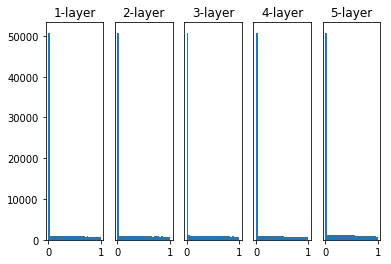

In [7]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000개의 입력 데이터를 무작위로 생성
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
    w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)

    a = np.dot(x, w)
    
    z = ReLU(a)
    
    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()


-


ReLU를 활성화 함수로 사용할 때, 가중치 초깃값에 따른 활성화 값 분포 비교


![Imgur](https://i.imgur.com/p5KBDty.png)

표준편차 0.01일 때 : 활성화 값은 아주 작은 값. 역전파 때 가중치 기울기가 작아짐

Xavier 초깃값 : 층이 깊어지면서 치우침이 커짐.

He 초깃값 : 모든 층에서 균일하게 분포. 

#### 활성화 함수로 ReLU를 사용할 때는 He 초깃값을, S자 모양 곡선(sigmoid, tanh)일 때는 Xavier 초깃값을 사용